<a href="https://colab.research.google.com/github/linnea-backgard/ai-ml-principles-exercises/blob/main/ML-training/activeloop-deeplake/predict_weather_keras.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [23]:
!pip install deeplake

!pip install wandb

import tensorflow as tf
import numpy as np
import deeplake
import wandb

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [24]:
def preprocess_sample(image, label):
  image = tf.image.resize_with_crop_or_pad(image, 240, 320)
  image = tf.math.reduce_mean(image, axis=2, keepdims=False)
  image = image / 128 - 1
  return image, label 


hub_ds = deeplake.load("hub://kingabzpro/muticlass-weather-dataset")
tf_ds = (hub_ds.tensorflow(tensors=["images", "labels"])
               .map(lambda d: (d["images"], d["labels"]))
               .map(preprocess_sample)
)

hub://kingabzpro/muticlass-weather-dataset loaded successfully.
This dataset can be visualized in Jupyter Notebook by ds.visualize() or at https://app.activeloop.ai/kingabzpro/muticlass-weather-dataset


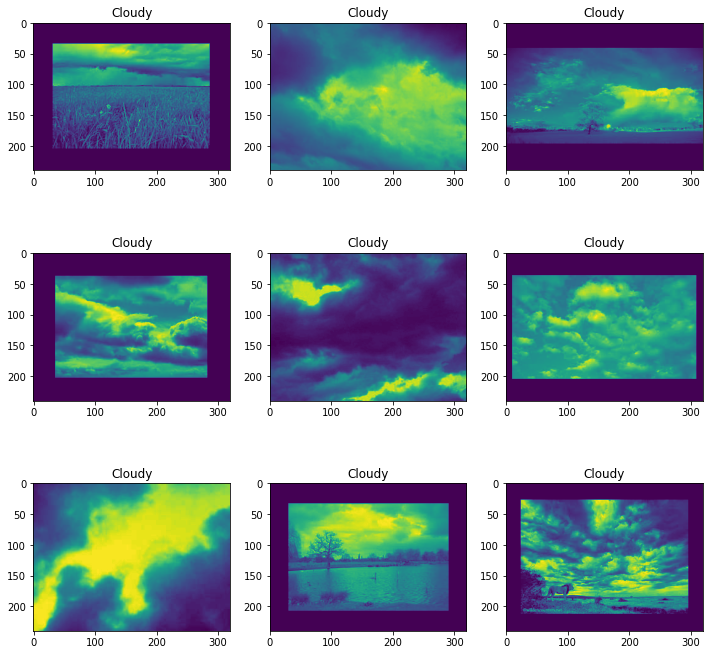

CPU times: user 1.58 s, sys: 98.2 ms, total: 1.67 s
Wall time: 5.67 s


In [25]:
%%time

import matplotlib.pyplot as plt

images, labels = next(iter(tf_ds.take(9).batch(9)))
images = [img.numpy() for img in images]

_, axs = plt.subplots(3, 3, figsize=(12, 12))
axs = axs.flatten()
for image, label, ax in zip(images, labels, axs):
  ax.imshow(image)
  ax.set_title(hub_ds.labels.info.class_names[label[0].numpy()])
plt.show()

In [26]:
batch_size = 120
epochs = 50


In [27]:
# Define the model architecture
model = tf.keras.Sequential([
  tf.keras.layers.InputLayer(input_shape=(240, 320)),
  tf.keras.layers.Reshape(target_shape=(240, 320, 1)),
  tf.keras.layers.Conv2D(filters=12, kernel_size=(3, 3), activation='relu'),
  tf.keras.layers.MaxPooling2D(pool_size=(2, 2)),
  tf.keras.layers.Conv2D(filters=12, kernel_size=(3, 3), activation='relu'),
  tf.keras.layers.MaxPooling2D(pool_size=(2, 2)),
  tf.keras.layers.Flatten(),
  tf.keras.layers.Dense(len(hub_ds.labels.info.class_names))
])

model.compile(
  optimizer='adam',
  loss=tf.keras.losses.SparseCategoricalCrossentropy(from_logits=True),
  metrics=['accuracy']
)

tf_ds_tmp = tf_ds.shuffle(len(hub_ds)).batch(batch_size)
tf_ds_valid = tf_ds_tmp.take(1)  # One batch for validation
tf_ds_train = tf_ds_tmp.skip(1)

In [28]:
%%time

wandb.init(project= "predict_weather_keras2", config={"batch_size": batch_size, "epochs": epochs})

model.fit(
  tf_ds_train,
  epochs= epochs,
  validation_data=tf_ds_valid, callbacks=[wandb.keras.WandbCallback()])

wandb.finish()

Epoch 1/50
      9/Unknown - 87s 5s/step - loss: 2.6037 - accuracy: 0.3333

wandb: Adding directory to artifact (/content/wandb/run-20221214_122702-369lfvus/files/model-best)... Done. 0.0s


9/9 [==============================] - 129s 10s/step - loss: 2.6037 - accuracy: 0.3333 - val_loss: 1.3036 - val_accuracy: 0.4667
Epoch 2/50
9/9 [==============================] - ETA: 0s - loss: 1.2313 - accuracy: 0.4388

wandb: Adding directory to artifact (/content/wandb/run-20221214_122702-369lfvus/files/model-best)... Done. 0.0s


9/9 [==============================] - 114s 9s/step - loss: 1.2313 - accuracy: 0.4388 - val_loss: 1.0633 - val_accuracy: 0.5667
Epoch 3/50
9/9 [==============================] - ETA: 0s - loss: 1.0522 - accuracy: 0.5353

wandb: Adding directory to artifact (/content/wandb/run-20221214_122702-369lfvus/files/model-best)... Done. 0.0s


9/9 [==============================] - 117s 9s/step - loss: 1.0522 - accuracy: 0.5353 - val_loss: 1.0048 - val_accuracy: 0.5500
Epoch 4/50
9/9 [==============================] - ETA: 0s - loss: 0.9624 - accuracy: 0.5652

wandb: Adding directory to artifact (/content/wandb/run-20221214_122702-369lfvus/files/model-best)... Done. 0.0s


9/9 [==============================] - 114s 9s/step - loss: 0.9624 - accuracy: 0.5652 - val_loss: 0.8396 - val_accuracy: 0.6583
Epoch 5/50
9/9 [==============================] - 122s 10s/step - loss: 0.8740 - accuracy: 0.6348 - val_loss: 0.8657 - val_accuracy: 0.6083
Epoch 6/50
9/9 [==============================] - ETA: 0s - loss: 0.8262 - accuracy: 0.6448

wandb: Adding directory to artifact (/content/wandb/run-20221214_122702-369lfvus/files/model-best)... Done. 0.0s


9/9 [==============================] - 119s 10s/step - loss: 0.8262 - accuracy: 0.6448 - val_loss: 0.7235 - val_accuracy: 0.6500
Epoch 7/50
9/9 [==============================] - ETA: 0s - loss: 0.7815 - accuracy: 0.6697

wandb: Adding directory to artifact (/content/wandb/run-20221214_122702-369lfvus/files/model-best)... Done. 0.0s


9/9 [==============================] - 118s 9s/step - loss: 0.7815 - accuracy: 0.6697 - val_loss: 0.6225 - val_accuracy: 0.7417
Epoch 8/50
9/9 [==============================] - 118s 9s/step - loss: 0.7082 - accuracy: 0.7274 - val_loss: 0.6612 - val_accuracy: 0.7167
Epoch 9/50
9/9 [==============================] - ETA: 0s - loss: 0.6814 - accuracy: 0.7164

wandb: Adding directory to artifact (/content/wandb/run-20221214_122702-369lfvus/files/model-best)... Done. 0.0s


9/9 [==============================] - 124s 10s/step - loss: 0.6814 - accuracy: 0.7164 - val_loss: 0.5788 - val_accuracy: 0.7917
Epoch 10/50
9/9 [==============================] - ETA: 0s - loss: 0.6339 - accuracy: 0.7612

wandb: Adding directory to artifact (/content/wandb/run-20221214_122702-369lfvus/files/model-best)... Done. 0.0s


9/9 [==============================] - 114s 9s/step - loss: 0.6339 - accuracy: 0.7612 - val_loss: 0.5715 - val_accuracy: 0.7583
Epoch 11/50
9/9 [==============================] - ETA: 0s - loss: 0.6067 - accuracy: 0.7612

wandb: Adding directory to artifact (/content/wandb/run-20221214_122702-369lfvus/files/model-best)... Done. 0.0s


9/9 [==============================] - 107s 9s/step - loss: 0.6067 - accuracy: 0.7612 - val_loss: 0.4990 - val_accuracy: 0.7750
Epoch 12/50
9/9 [==============================] - 108s 9s/step - loss: 0.5613 - accuracy: 0.7980 - val_loss: 0.5594 - val_accuracy: 0.8000
Epoch 13/50
9/9 [==============================] - ETA: 0s - loss: 0.5126 - accuracy: 0.8328

wandb: Adding directory to artifact (/content/wandb/run-20221214_122702-369lfvus/files/model-best)... Done. 0.0s


9/9 [==============================] - 120s 10s/step - loss: 0.5126 - accuracy: 0.8328 - val_loss: 0.4927 - val_accuracy: 0.8250
Epoch 14/50
9/9 [==============================] - ETA: 0s - loss: 0.4839 - accuracy: 0.8398

wandb: Adding directory to artifact (/content/wandb/run-20221214_122702-369lfvus/files/model-best)... Done. 0.0s


9/9 [==============================] - 128s 10s/step - loss: 0.4839 - accuracy: 0.8398 - val_loss: 0.4232 - val_accuracy: 0.8750
Epoch 15/50
9/9 [==============================] - ETA: 0s - loss: 0.4380 - accuracy: 0.8617

wandb: Adding directory to artifact (/content/wandb/run-20221214_122702-369lfvus/files/model-best)... Done. 0.0s


9/9 [==============================] - 120s 10s/step - loss: 0.4380 - accuracy: 0.8617 - val_loss: 0.3937 - val_accuracy: 0.8917
Epoch 16/50
9/9 [==============================] - ETA: 0s - loss: 0.3990 - accuracy: 0.8786

wandb: Adding directory to artifact (/content/wandb/run-20221214_122702-369lfvus/files/model-best)... Done. 0.0s


9/9 [==============================] - 125s 10s/step - loss: 0.3990 - accuracy: 0.8786 - val_loss: 0.3057 - val_accuracy: 0.9000
Epoch 17/50
9/9 [==============================] - 120s 9s/step - loss: 0.3753 - accuracy: 0.8886 - val_loss: 0.4536 - val_accuracy: 0.8333
Epoch 18/50
9/9 [==============================] - 120s 9s/step - loss: 0.3590 - accuracy: 0.8826 - val_loss: 0.3725 - val_accuracy: 0.8833
Epoch 19/50
9/9 [==============================] - ETA: 0s - loss: 0.3234 - accuracy: 0.9045

wandb: Adding directory to artifact (/content/wandb/run-20221214_122702-369lfvus/files/model-best)... Done. 0.0s


9/9 [==============================] - 125s 10s/step - loss: 0.3234 - accuracy: 0.9045 - val_loss: 0.2781 - val_accuracy: 0.9083
Epoch 20/50
9/9 [==============================] - 118s 10s/step - loss: 0.3197 - accuracy: 0.9025 - val_loss: 0.3439 - val_accuracy: 0.8583
Epoch 21/50
9/9 [==============================] - ETA: 0s - loss: 0.2908 - accuracy: 0.9224

wandb: Adding directory to artifact (/content/wandb/run-20221214_122702-369lfvus/files/model-best)... Done. 0.0s


9/9 [==============================] - 117s 9s/step - loss: 0.2908 - accuracy: 0.9224 - val_loss: 0.2072 - val_accuracy: 0.9750
Epoch 22/50
9/9 [==============================] - 116s 9s/step - loss: 0.2700 - accuracy: 0.9214 - val_loss: 0.2854 - val_accuracy: 0.9083
Epoch 23/50
9/9 [==============================] - 118s 10s/step - loss: 0.2325 - accuracy: 0.9512 - val_loss: 0.2474 - val_accuracy: 0.9333
Epoch 24/50
9/9 [==============================] - ETA: 0s - loss: 0.2220 - accuracy: 0.9453

wandb: Adding directory to artifact (/content/wandb/run-20221214_122702-369lfvus/files/model-best)... Done. 0.0s


9/9 [==============================] - 119s 9s/step - loss: 0.2220 - accuracy: 0.9453 - val_loss: 0.1985 - val_accuracy: 0.9417
Epoch 25/50
9/9 [==============================] - 118s 9s/step - loss: 0.2045 - accuracy: 0.9463 - val_loss: 0.2058 - val_accuracy: 0.9250
Epoch 26/50
9/9 [==============================] - ETA: 0s - loss: 0.1894 - accuracy: 0.9532

wandb: Adding directory to artifact (/content/wandb/run-20221214_122702-369lfvus/files/model-best)... Done. 0.0s


9/9 [==============================] - 116s 9s/step - loss: 0.1894 - accuracy: 0.9532 - val_loss: 0.1733 - val_accuracy: 0.9333
Epoch 27/50
9/9 [==============================] - ETA: 0s - loss: 0.1706 - accuracy: 0.9502

wandb: Adding directory to artifact (/content/wandb/run-20221214_122702-369lfvus/files/model-best)... Done. 0.0s


9/9 [==============================] - 122s 10s/step - loss: 0.1706 - accuracy: 0.9502 - val_loss: 0.1630 - val_accuracy: 0.9750
Epoch 28/50
9/9 [==============================] - ETA: 0s - loss: 0.1644 - accuracy: 0.9632

wandb: Adding directory to artifact (/content/wandb/run-20221214_122702-369lfvus/files/model-best)... Done. 0.0s


9/9 [==============================] - 122s 10s/step - loss: 0.1644 - accuracy: 0.9632 - val_loss: 0.1044 - val_accuracy: 0.9833
Epoch 29/50
9/9 [==============================] - 113s 9s/step - loss: 0.1580 - accuracy: 0.9592 - val_loss: 0.1390 - val_accuracy: 0.9667
Epoch 30/50
9/9 [==============================] - 115s 9s/step - loss: 0.1522 - accuracy: 0.9562 - val_loss: 0.1500 - val_accuracy: 0.9750
Epoch 31/50
9/9 [==============================] - 115s 9s/step - loss: 0.1401 - accuracy: 0.9692 - val_loss: 0.1195 - val_accuracy: 0.9833
Epoch 32/50
9/9 [==============================] - 117s 9s/step - loss: 0.1254 - accuracy: 0.9692 - val_loss: 0.1291 - val_accuracy: 0.9667
Epoch 33/50
9/9 [==============================] - 122s 10s/step - loss: 0.1338 - accuracy: 0.9542 - val_loss: 0.1342 - val_accuracy: 0.9667
Epoch 34/50
9/9 [==============================] - 120s 9s/step - loss: 0.1232 - accuracy: 0.9652 - val_loss: 0.1293 - val_accuracy: 0.9667
Epoch 35/50
9/9 [=============

wandb: Adding directory to artifact (/content/wandb/run-20221214_122702-369lfvus/files/model-best)... Done. 0.0s


9/9 [==============================] - 127s 10s/step - loss: 0.0941 - accuracy: 0.9811 - val_loss: 0.0669 - val_accuracy: 1.0000
Epoch 39/50
9/9 [==============================] - 124s 10s/step - loss: 0.0795 - accuracy: 0.9881 - val_loss: 0.0850 - val_accuracy: 0.9833
Epoch 40/50
9/9 [==============================] - 124s 10s/step - loss: 0.0743 - accuracy: 0.9851 - val_loss: 0.0772 - val_accuracy: 0.9917
Epoch 41/50
9/9 [==============================] - 126s 10s/step - loss: 0.0650 - accuracy: 0.9910 - val_loss: 0.0720 - val_accuracy: 0.9750
Epoch 42/50
9/9 [==============================] - ETA: 0s - loss: 0.0641 - accuracy: 0.9881

wandb: Adding directory to artifact (/content/wandb/run-20221214_122702-369lfvus/files/model-best)... Done. 0.0s


9/9 [==============================] - 127s 10s/step - loss: 0.0641 - accuracy: 0.9881 - val_loss: 0.0547 - val_accuracy: 1.0000
Epoch 43/50
9/9 [==============================] - ETA: 0s - loss: 0.0626 - accuracy: 0.9871

wandb: Adding directory to artifact (/content/wandb/run-20221214_122702-369lfvus/files/model-best)... Done. 0.0s


9/9 [==============================] - 119s 10s/step - loss: 0.0626 - accuracy: 0.9871 - val_loss: 0.0360 - val_accuracy: 1.0000
Epoch 44/50
9/9 [==============================] - 180s 10s/step - loss: 0.0590 - accuracy: 0.9891 - val_loss: 0.0699 - val_accuracy: 1.0000
Epoch 45/50
9/9 [==============================] - 122s 9s/step - loss: 0.0534 - accuracy: 0.9940 - val_loss: 0.0476 - val_accuracy: 1.0000
Epoch 46/50
9/9 [==============================] - 124s 10s/step - loss: 0.0525 - accuracy: 0.9900 - val_loss: 0.0587 - val_accuracy: 0.9833
Epoch 47/50
9/9 [==============================] - 117s 9s/step - loss: 0.0503 - accuracy: 0.9930 - val_loss: 0.0533 - val_accuracy: 0.9917
Epoch 48/50
9/9 [==============================] - 121s 10s/step - loss: 0.0461 - accuracy: 0.9940 - val_loss: 0.0908 - val_accuracy: 0.9667
Epoch 49/50
9/9 [==============================] - ETA: 0s - loss: 0.0496 - accuracy: 0.9920

wandb: Adding directory to artifact (/content/wandb/run-20221214_122702-369lfvus/files/model-best)... Done. 0.0s


9/9 [==============================] - 123s 10s/step - loss: 0.0496 - accuracy: 0.9920 - val_loss: 0.0229 - val_accuracy: 1.0000
Epoch 50/50
9/9 [==============================] - 121s 9s/step - loss: 0.0393 - accuracy: 0.9970 - val_loss: 0.0456 - val_accuracy: 0.9833


accuracy,▁▂▃▃▄▅▅▅▆▆▆▆▇▇▇▇▇▇█▇████████████████████
epoch,▁▁▁▁▂▂▂▂▂▃▃▃▃▃▃▄▄▄▄▄▅▅▅▅▅▅▆▆▆▆▆▆▇▇▇▇▇███
loss,█▄▄▄▃▃▃▃▃▂▂▂▂▂▂▂▂▂▂▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁
val_accuracy,▁▂▂▄▃▅▄▅▅▅▆▆▇▆▆▇█▇▇▇▇███████▇███████████
val_loss,█▇▆▅▅▄▄▄▄▄▄▃▂▃▃▂▂▂▂▂▂▂▁▂▁▂▂▂▂▁▁▁▁▁▁▁▁▁▁▁
accuracy,0.99701
best_epoch,48
best_val_loss,0.02289
epoch,49
loss,0.03926
val_accuracy,0.98333


CPU times: user 1h 45min 32s, sys: 3min 23s, total: 1h 48min 56s
Wall time: 1h 50min 54s


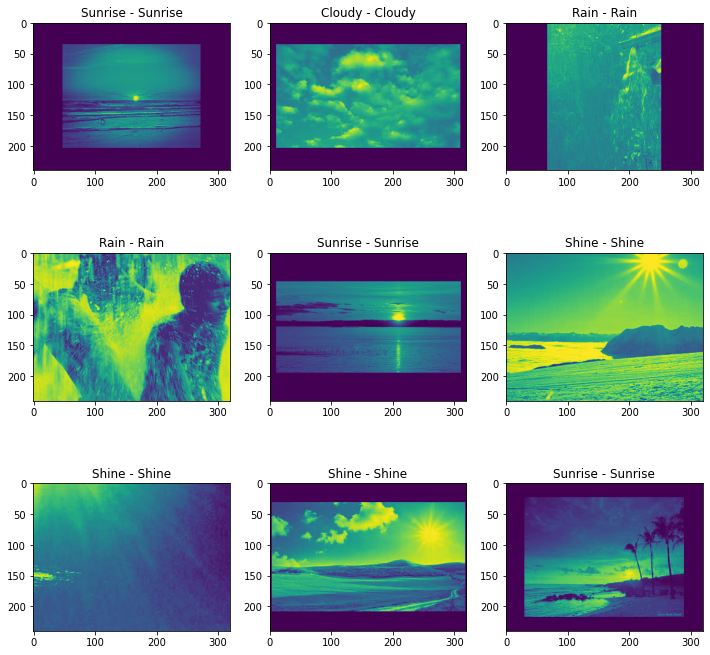

In [29]:
images, labels = next(iter(tf_ds_valid.unbatch().take(9).batch(9)))
images = [img.numpy() for img in images]

_, axs = plt.subplots(3, 3, figsize=(12, 12))
axs = axs.flatten()
for image, label, ax in zip(images, labels, axs):
  true_class = label[0].numpy()
  pred_class = np.argmax(model(image[None]))
  title = f"{hub_ds.labels.info.class_names[true_class]} - {hub_ds.labels.info.class_names[pred_class]}"
  ax.imshow(image)
  ax.set_title(title)
plt.show()